In [46]:
import geopandas as gpd
%matplotlib inline

In [47]:
import pandas as pd
import json
import plotly.figure_factory as ff

In [104]:
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

hs_data = pd.read_csv("/home/mila/t/tengmeli/ecosystem-embedding/hotspots_june_filtered.csv")
hs_data = hs_data[["hotspot_id", "lon","lat", "county", "county_code", "state", "state_code",'june_complete_checklists']]
hs_train = pd.read_csv("/network/scratch/t/tengmeli/ecosystem-embedding/training/train_june.csv")

hs_train= hs_train.merge(hs_data, how="inner", left_on ="hotspot",right_on ="hotspot_id")

ansi= pd.read_csv("ansi.csv")

ansi[' st'] = ansi[' st'].astype(str)

for index, row in ansi.iterrows():
    if len(row[' st']) == 1:
        ansi.iloc[index][" st"] = "0" + row[' st']

for index, row in ansi.iterrows():  
    ansi.iloc[index][' stusps'] = row[' stusps'].strip()

geoData = geoData.merge(ansi, how="left", left_on ="STATE", right_on = " st")
geoData["totalcode"]="US-" + geoData[" stusps"]+"-" + geoData["COUNTY"]
geoData = geoData.merge(hs_train, how = "right", left_on ="totalcode", right_on = "county_code")


fips = geoData["id"].unique()

train_df = geoData.drop_duplicates(["id"])


In [68]:
summed_train = geoData.groupby(["id"])['june_complete_checklists'].sum().reset_index()

summed_train = summed_train.rename(columns={"june_complete_checklists": "summed"})


totaledck = train_df.merge(summed_train, how = "left",left_on ="id",right_on ="id") 

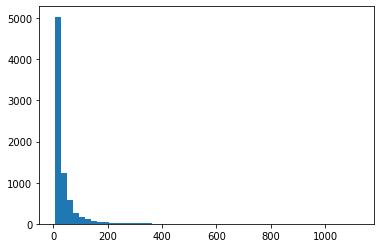

In [111]:
plt.hist(geoData["june_complete_checklists"].values, bins = 50) 
plt.show()

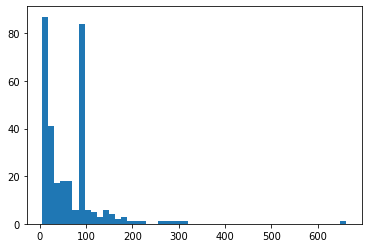

In [110]:
plt.hist(totaledckv["summed"].values, bins = 50)  # density=False would make counts
plt.show()

In [76]:
geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

hs_val = pd.read_csv("/network/scratch/t/tengmeli/ecosystem-embedding/training/val_june.csv")

hs_val= hs_val.merge(hs_data, how="inner", left_on ="hotspot",right_on ="hotspot_id")

ansi= pd.read_csv("ansi.csv")

ansi[' st'] = ansi[' st'].astype(str)

for index, row in ansi.iterrows():
    if len(row[' st']) == 1:
        ansi.iloc[index][" st"] = "0" + row[' st']

for index, row in ansi.iterrows():  
    ansi.iloc[index][' stusps'] = row[' stusps'].strip()

geoDatav = geoDatav.merge(ansi, how="left", left_on ="STATE", right_on = " st")
geoDatav["totalcode"]="US-" + geoDatav[" stusps"]+"-" + geoDatav["COUNTY"]
geoDatav = geoDatav.merge(hs_val, how = "right", left_on ="totalcode", right_on = "county_code")

fips = geoDatav["id"].unique()

val_df = geoDatav.drop_duplicates(["id"])


In [77]:
summed_val = geoDatav.groupby(["id"])['june_complete_checklists'].sum().reset_index()

summed_val = summed_val.rename(columns={"june_complete_checklists": "summed"})

totaledckv = val_df.merge(summed_val, how = "left",left_on ="id",right_on ="id") 

In [37]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
colormap = cm.viridis
colormap_r = ListedColormap(colormap.colors[::-1])

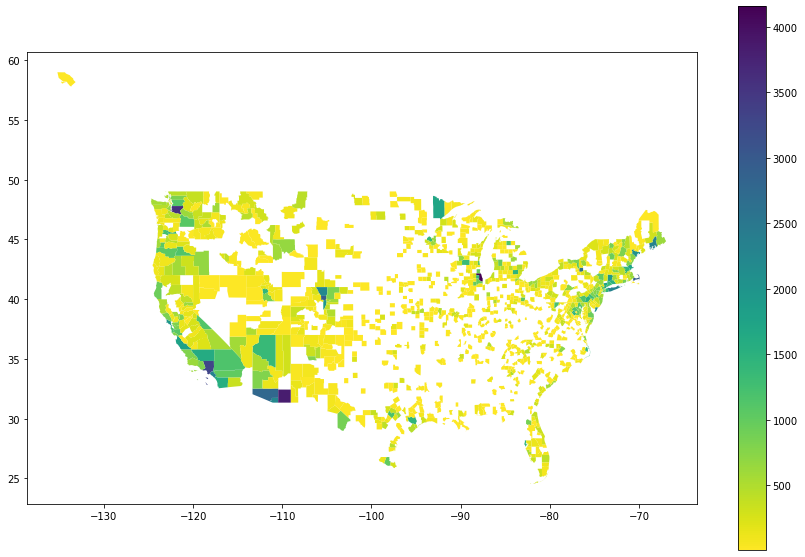

In [74]:
figv = totaledck.plot("summed", cmap=colormap_r, legend = True, figsize=(15, 10))

In [75]:
figv.figure.savefig('train.png')

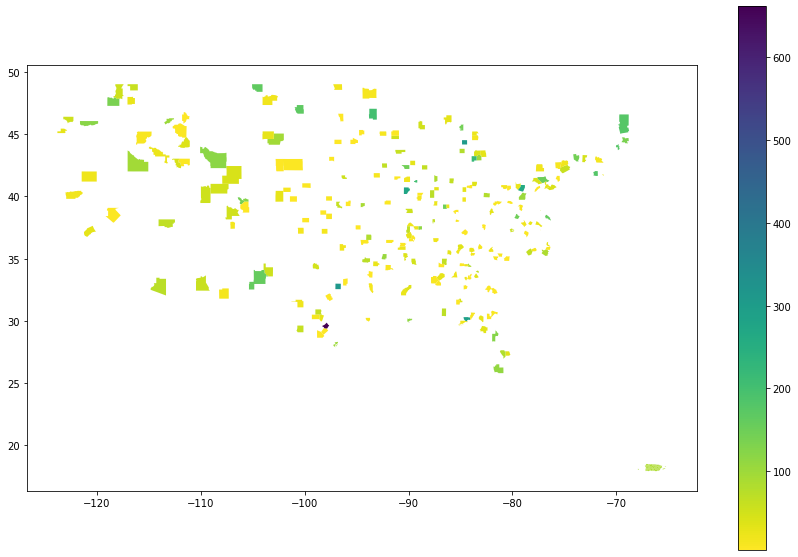

In [78]:
figv = totaledckv.plot("summed", cmap=colormap_r, legend = True, figsize=(15, 10))
figv.figure.savefig('val.png')

In [8]:
val_df["valid"] = 100
train_df["valid"] = 50

In [9]:
result = pd.concat([val_df, train_df])

In [29]:
from matplotlib import pyplot as plt


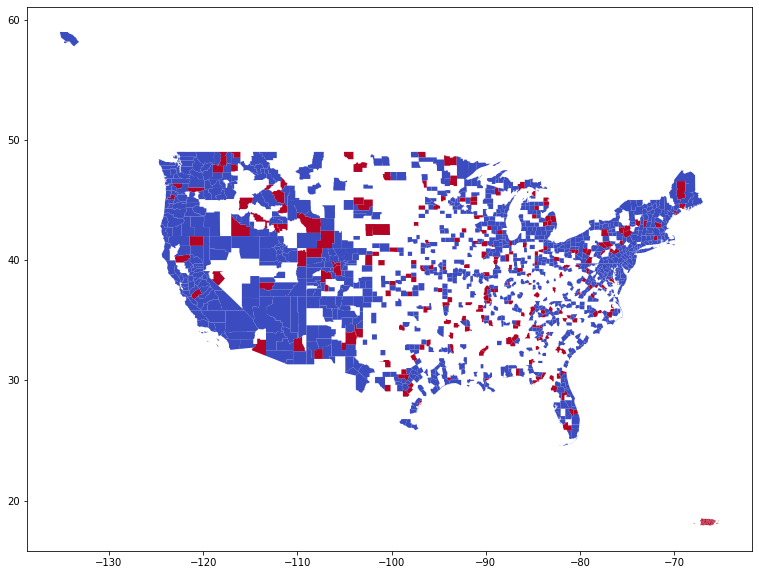

In [30]:
figv = result.plot("valid", cmap="coolwarm", figsize=(15, 10))

In [31]:
figv.figure.savefig('trainval.png')